# Exploratory Data Analysis and Intro

# Goal 

1. Investigate top-paying roles and skills in the data science industry. 
2. USe Python to explore a real-live datasetvon job postings. 
3. For job-seekers: Use these insights to help find the best job opportunities. 

# Final Deliverables:
1. Create Jupyter Notebooks(showcasing core skill in python).
2. create a summary page (Via README) capturing your findings . 
3. Share this project via GitHub and Linkedin.


In [1]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
#!pip install datasets

#Install datasets library
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [6]:
import seaborn as sns

# Roles Explore

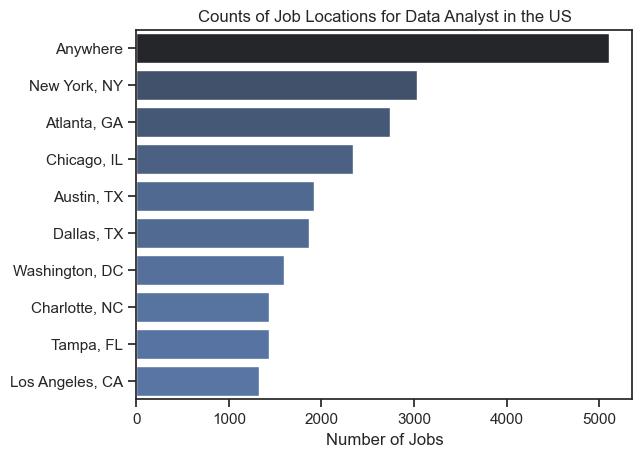

In [13]:
df_plot = df_DA_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette='dark:b_r', legend = False)
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

# Job Opportunities

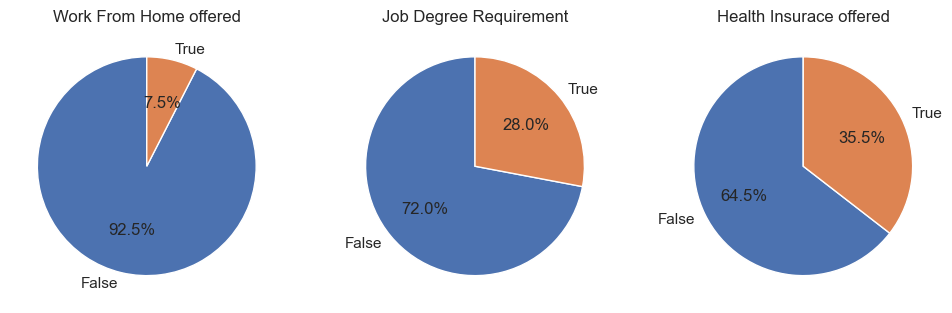

In [15]:
# Rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work From Home offered',
    'job_no_degree_mention': 'Job Degree Requirement',
    'job_health_insurance': 'Health Insurace offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i,(column, title) in enumerate(dict_column.items()):
     ax[i].pie(df_DA_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels= ['False', 'True'])
     ax[i].set_title(title)

# plt.suptitles('Benfit Analysis of Data Jobs, fontsize = 16)
plt.show()

# Companies to Explore:

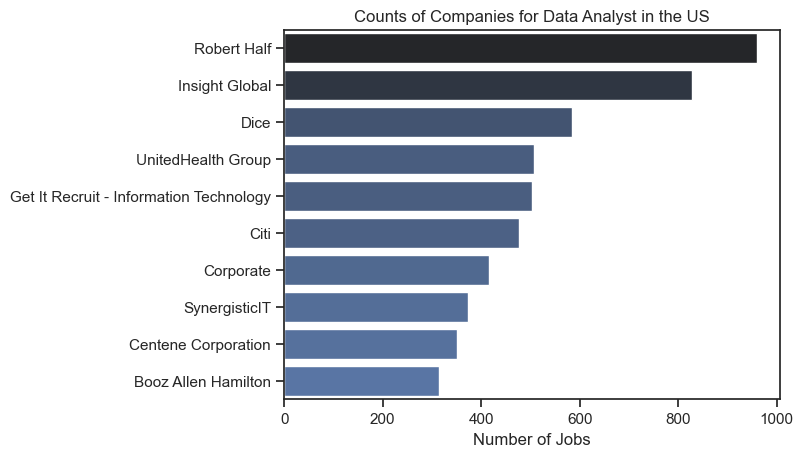

In [16]:
df_plot = df_DA_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style= 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette='dark:b_r', legend = False)
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()